In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [43]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
training = training.iloc[:, 1:] # Dropping 'Unnamed' column
test = test.iloc[:, 1:] # Dropping 'Unnamed' column


## LDA - Checks on the assumptions
## CONTROLLA RISTRENGENDO AI KINGDOM

In [45]:
import scipy.stats as stats, pingouin as pg

kingdoms = np.unique(training.loc[:, "Kingdom"])

# Shapiro-test for each feature in each Kingdom
for col in range(5, 69):
    for kingdom in kingdoms:
        stat, p = stats.shapiro(training[training.loc[:, "Kingdom"] == kingdom].iloc[:, col])
        print(f'Shapiro-Wilk Test for [{training.columns.tolist()[col]}] in {kingdom} : statistic={stat}, p-value={p}')

# Multivariate Normality test considering all features for each Kingdom
for kingdom in np.unique(training.loc[:, "Kingdom"]):
    hz_test = pg.multivariate_normality(training[training.loc[:, 'Kingdom']==kingdom].iloc[:, 5:])
    print(f" {kingdom} ", hz_test)

Shapiro-Wilk Test for [UUU] in arc : statistic=0.9666157644196436, p-value=0.011637842124512741
Shapiro-Wilk Test for [UUU] in bct : statistic=0.9405073064885423, p-value=1.1675070215460055e-29
Shapiro-Wilk Test for [UUU] in inv : statistic=0.7602696525025234, p-value=7.137077998328769e-37
Shapiro-Wilk Test for [UUU] in mam : statistic=0.9476007491043563, p-value=1.1847296418020915e-11
Shapiro-Wilk Test for [UUU] in phg : statistic=0.9714185324411057, p-value=0.0011012917384280946
Shapiro-Wilk Test for [UUU] in plm : statistic=0.9432675402721048, p-value=0.461784827363552
Shapiro-Wilk Test for [UUU] in pln : statistic=0.9089288547803469, p-value=3.882242987339003e-33
Shapiro-Wilk Test for [UUU] in pri : statistic=0.9517595425267541, p-value=6.579343054767416e-05
Shapiro-Wilk Test for [UUU] in rod : statistic=0.9533226688544535, p-value=1.7949816037112456e-05
Shapiro-Wilk Test for [UUU] in vrl : statistic=0.9739065707653801, p-value=6.565075528796975e-20
Shapiro-Wilk Test for [UUU] in v

Shapiro-Wilk Test for [AUA] in phg : statistic=0.90646807511907, p-value=3.928100726124719e-09
Shapiro-Wilk Test for [AUA] in plm : statistic=0.9192753360307909, p-value=0.2146762010310223
Shapiro-Wilk Test for [AUA] in pln : statistic=0.9154183487850959, p-value=3.6578464079741113e-32
Shapiro-Wilk Test for [AUA] in pri : statistic=0.8896077666922646, p-value=6.1246548341514455e-09
Shapiro-Wilk Test for [AUA] in rod : statistic=0.9412501110331588, p-value=1.5995213750068195e-06
Shapiro-Wilk Test for [AUA] in vrl : statistic=0.8830990981919555, p-value=2.5202747415432566e-38
Shapiro-Wilk Test for [AUA] in vrt : statistic=0.9417801077410194, p-value=4.674763592938934e-25
Shapiro-Wilk Test for [AUG] in arc : statistic=0.9740872901726811, p-value=0.043953080118747524
Shapiro-Wilk Test for [AUG] in bct : statistic=0.9951718129803384, p-value=7.002013652081263e-07
Shapiro-Wilk Test for [AUG] in inv : statistic=0.9840834903240985, p-value=1.8801581964762264e-09
Shapiro-Wilk Test for [AUG] in 

Shapiro-Wilk Test for [CCU] in plm : statistic=0.9831404111554656, p-value=0.9890747637054649
Shapiro-Wilk Test for [CCU] in pln : statistic=0.983970547864287, p-value=2.8541152264826625e-14
Shapiro-Wilk Test for [CCU] in pri : statistic=0.974128161327726, p-value=0.007888866080663278
Shapiro-Wilk Test for [CCU] in rod : statistic=0.9895862238546719, p-value=0.23969502578232132
Shapiro-Wilk Test for [CCU] in vrl : statistic=0.9640418850386016, p-value=2.5750901471178734e-23
Shapiro-Wilk Test for [CCU] in vrt : statistic=0.948204519289325, p-value=9.573988807475304e-24
Shapiro-Wilk Test for [CCC] in arc : statistic=0.9470771999591623, p-value=0.0004981810290720719
Shapiro-Wilk Test for [CCC] in bct : statistic=0.9120329499588845, p-value=8.424156853230656e-35
Shapiro-Wilk Test for [CCC] in inv : statistic=0.9293205886783892, p-value=4.1058063122955164e-22
Shapiro-Wilk Test for [CCC] in mam : statistic=0.9915430802645493, p-value=0.010327639747440194
Shapiro-Wilk Test for [CCC] in phg : 

Shapiro-Wilk Test for [UCC] in mam : statistic=0.9788560587541636, p-value=3.2674805429968087e-06
Shapiro-Wilk Test for [UCC] in phg : statistic=0.9746074858354626, p-value=0.0026270315420914713
Shapiro-Wilk Test for [UCC] in plm : statistic=0.9802744419216253, p-value=0.9763652294179048
Shapiro-Wilk Test for [UCC] in pln : statistic=0.9565736799825919, p-value=4.56303142370988e-24
Shapiro-Wilk Test for [UCC] in pri : statistic=0.966442873743986, p-value=0.0013392824368493458
Shapiro-Wilk Test for [UCC] in rod : statistic=0.978422442470441, p-value=0.008878169525666592
Shapiro-Wilk Test for [UCC] in vrl : statistic=0.9005309734818829, p-value=4.88154319928212e-36
Shapiro-Wilk Test for [UCC] in vrt : statistic=0.9951115006464453, p-value=2.9824983039447968e-05
Shapiro-Wilk Test for [UCA] in arc : statistic=0.9592912831063664, p-value=0.0033727749442434623
Shapiro-Wilk Test for [UCA] in bct : statistic=0.8878418509738604, p-value=3.266991257312684e-38
Shapiro-Wilk Test for [UCA] in inv :

Shapiro-Wilk Test for [UAC] in rod : statistic=0.9849899317417024, p-value=0.06153585584823479
Shapiro-Wilk Test for [UAC] in vrl : statistic=0.9605512745330707, p-value=2.3597685286139325e-24
Shapiro-Wilk Test for [UAC] in vrt : statistic=0.9579667149567985, p-value=1.69792261314472e-21
Shapiro-Wilk Test for [CAA] in arc : statistic=0.8990485418021262, p-value=1.150748382842529e-06
Shapiro-Wilk Test for [CAA] in bct : statistic=0.9446734943419371, p-value=9.423778287803824e-29
Shapiro-Wilk Test for [CAA] in inv : statistic=0.9358303341076448, p-value=4.092189180131698e-21
Shapiro-Wilk Test for [CAA] in mam : statistic=0.9600379651562684, p-value=8.074069269555522e-10
Shapiro-Wilk Test for [CAA] in phg : statistic=0.9714067295504023, p-value=0.001097824909425548
Shapiro-Wilk Test for [CAA] in plm : statistic=0.9693016812475077, p-value=0.8671731651834708
Shapiro-Wilk Test for [CAA] in pln : statistic=0.4939953256285421, p-value=5.026536870567399e-60
Shapiro-Wilk Test for [CAA] in pri :

Shapiro-Wilk Test for [CGU] in mam : statistic=0.8618845874473959, p-value=1.1103349798982152e-19
Shapiro-Wilk Test for [CGU] in phg : statistic=0.9671943408919228, p-value=0.0003669932474414534
Shapiro-Wilk Test for [CGU] in plm : statistic=0.9232084425681332, p-value=0.24447998627191075
Shapiro-Wilk Test for [CGU] in pln : statistic=0.9032464116283139, p-value=6.0272631109152205e-34
Shapiro-Wilk Test for [CGU] in pri : statistic=0.9450773496165976, p-value=1.9196734087328346e-05
Shapiro-Wilk Test for [CGU] in rod : statistic=0.9232135507244947, p-value=6.861685094850682e-08
Shapiro-Wilk Test for [CGU] in vrl : statistic=0.9441131583133675, p-value=1.797688587116182e-28
Shapiro-Wilk Test for [CGU] in vrt : statistic=0.8542697968788631, p-value=1.1873038425391535e-36
Shapiro-Wilk Test for [CGC] in arc : statistic=0.9295826923297916, p-value=4.327937382441658e-05
Shapiro-Wilk Test for [CGC] in bct : statistic=0.9431080232933404, p-value=4.2405095194531703e-29
Shapiro-Wilk Test for [CGC]

Shapiro-Wilk Test for [UAA] in inv : statistic=0.8212161200835424, p-value=5.7596365104107704e-33
Shapiro-Wilk Test for [UAA] in mam : statistic=0.9490951871106581, p-value=1.896444834462911e-11
Shapiro-Wilk Test for [UAA] in phg : statistic=0.9650352482996141, p-value=0.00021394072180548667
Shapiro-Wilk Test for [UAA] in plm : statistic=0.9582006277617567, p-value=0.6933738950218756
Shapiro-Wilk Test for [UAA] in pln : statistic=0.9121246389719455, p-value=1.1526985653243879e-32
Shapiro-Wilk Test for [UAA] in pri : statistic=0.9541394364168115, p-value=0.00010403197021915581
Shapiro-Wilk Test for [UAA] in rod : statistic=0.975163371060787, p-value=0.0035530539538113476
Shapiro-Wilk Test for [UAA] in vrl : statistic=0.967196839832623, p-value=2.604808314962506e-22
Shapiro-Wilk Test for [UAA] in vrt : statistic=0.8917842793554825, p-value=1.2294136076188618e-32
Shapiro-Wilk Test for [UAG] in arc : statistic=0.9101314531451146, p-value=3.968974848686031e-06
Shapiro-Wilk Test for [UAG] in

Statistiche KS: 0.09841099355211175
P-value: [2.596234545593137e-88]
Statistiche KS: 0.0672520228013701
P-value: [1.9883532201936323e-41]
Statistiche KS: 0.16023350523070973
P-value: [3.1297406126884806e-234]
Statistiche KS: 0.0640096349701275
P-value: [1.4437307964541036e-37]
Statistiche KS: 0.08367013011915947
P-value: [6.39522641079923e-64]
Statistiche KS: 0.09812650971897208
P-value: [8.370332794695435e-88]
Statistiche KS: 0.2840351314565521
P-value: [0.0]
Statistiche KS: 0.16186128780579223
P-value: [4.932425141208464e-239]
Statistiche KS: 0.07485444220484372
P-value: [3.1229919515497475e-51]
Statistiche KS: 0.10381713549862348
P-value: [2.956723174813908e-98]
Statistiche KS: 0.1277699781971462
P-value: [8.783628425456983e-149]
Statistiche KS: 0.05276200986413404
P-value: [1.1755216410368759e-25]
Statistiche KS: 0.1041163818489857
P-value: [8.03032129662076e-99]
Statistiche KS: 0.09460220608960257
P-value: [1.2529707150711405e-81]
Statistiche KS: 0.05549785434730348
P-value: [2.42

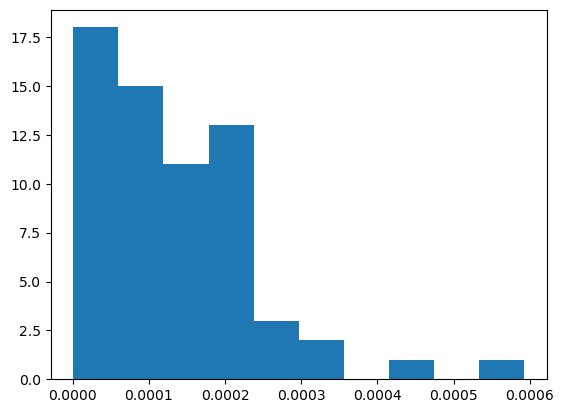

In [28]:
# Marco
# VARIANCE OF EACH VARIABLE

codons_variance = np.var(training.iloc[:, 5:], axis = 0)
plt.hist(codons_variance, bins = 10)

# Uso un test diverso dallo Shapiro-Wilk per testare la Normalità dei dati

for col in range(5, 69):
    mean = np.mean(training.iloc[:, col])
    std = np.std(training.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(training.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: [{p_value}]")     #Tutti rifiutano l'ipotesi di Normalità

In [30]:
from sklearn import preprocessing
    
normalized_training = pd.DataFrame(preprocessing.normalize(training.iloc[:, 5:], axis = 1))
for col in range(normalized_training.shape[1]):
    mean = np.mean(normalized_training.iloc[:, col])
    std = np.std(normalized_training.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(normalized_training.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: [{p_value}]")     #Tutti rifiutano l'ipotesi di Normalità


Statistiche KS: 0.08623260464029536
P-value: [7.1007622688021306e-68]
Statistiche KS: 0.03527992982328121
P-value: [1.0485975399092916e-11]
Statistiche KS: 0.12762454397762096
P-value: [1.916081640638477e-148]
Statistiche KS: 0.06327325660729322
P-value: [1.0225494107554249e-36]
Statistiche KS: 0.06500011664086514
P-value: [1.0007841112760571e-38]
Statistiche KS: 0.08641450848752552
P-value: [3.681438698350201e-68]
Statistiche KS: 0.2628329899320573
P-value: [0.0]
Statistiche KS: 0.14483000132245905
P-value: [3.064571191811143e-191]
Statistiche KS: 0.03094414567559601
P-value: [4.191200344363178e-09]
Statistiche KS: 0.06077385604796515
P-value: [6.634582806292272e-34]
Statistiche KS: 0.1026152138693101
P-value: [5.344287043270423e-96]
Statistiche KS: 0.057039982502285924
P-value: [6.473832950793767e-30]
Statistiche KS: 0.08885477500461669
P-value: [4.789931259478399e-72]
Statistiche KS: 0.060474775625735555
P-value: [1.4148178917390108e-33]
Statistiche KS: 0.04232466232254408
P-value: 

In [32]:
from sklearn import preprocessing
    
normalized_training_z = training.copy()
for col in range(5, 69):
    mean = np.mean(training.iloc[:, col])
    std = np.std(training.iloc[:, col])
    normalized_training_z.iloc[:, col] = (normalized_training_z.iloc[:, col] - mean)/std

normalized_training_z = normalized_training_z.iloc[:, 5:]
    
for col in range(normalized_training_z.shape[1]):
    mean = np.mean(normalized_training_z.iloc[:, col])
    std = np.std(normalized_training_z.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(normalized_training_z.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: [{p_value}]")     #Tutti rifiutano l'ipotesi di Normalità


Statistiche KS: 0.09841099355211175
P-value: [2.596234545593137e-88]
Statistiche KS: 0.0672520228013701
P-value: [1.9883532201936323e-41]
Statistiche KS: 0.16023350523070978
P-value: [3.129740612687307e-234]
Statistiche KS: 0.0640096349701275
P-value: [1.4437307964541036e-37]
Statistiche KS: 0.08367013011915947
P-value: [6.39522641079923e-64]
Statistiche KS: 0.09812650971897213
P-value: [8.370332794693526e-88]
Statistiche KS: 0.28403513145655207
P-value: [0.0]
Statistiche KS: 0.16186128780579223
P-value: [4.932425141208464e-239]
Statistiche KS: 0.07485444220484372
P-value: [3.1229919515497475e-51]
Statistiche KS: 0.10381713549862343
P-value: [2.956723174814622e-98]
Statistiche KS: 0.1277699781971462
P-value: [8.783628425456983e-149]
Statistiche KS: 0.05276200986413404
P-value: [1.1755216410368759e-25]
Statistiche KS: 0.10411638184898564
P-value: [8.030321296622704e-99]
Statistiche KS: 0.09460220608960268
P-value: [1.2529707150705897e-81]
Statistiche KS: 0.05549785434730348
P-value: [2.

## LDA - Checks on the outliers

In [11]:
import sklearn

training_with_outliers = training.copy()

for col in range(5, 69):
    considered_variable = training.iloc[:, col].copy()
    Q1 = considered_variable.quantile(0.25)
    Q3 = considered_variable.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    for idx, value in enumerate(considered_variable.tolist()):
        if value < lower or value > upper:
            considered_variable[idx] = True
        else: 
            considered_variable[idx] = False
    training_with_outliers.iloc[:, col] = considered_variable
        


C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: UUU, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: AUA, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: CCC, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: UCA, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: CAG, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: CGC, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4         True
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: UGA, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable


In [12]:
lis = []
for row in range(training_with_outliers.shape[0]):
    lis.append(all(training_with_outliers.iloc[row, 5:]))
sum(lis)

0

## One-hot encoding of DNA type feature

In [13]:
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values) #when you use an array to index another array in NumPy, it selects rows from the indexed array based on the values in the index array. e[a] selects rows from the identity matrix e based on the values in array a
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

In [14]:
training = onehot_feature(training, 'DNAtype')
test = onehot_feature(test, 'DNAtype')

training = training.drop(["SpeciesID", "SpeciesName"], axis = 1)
test = test.drop(["SpeciesID", "SpeciesName"], axis = 1)

## Fitting of the model

We remove the AGA feature from the training set (we will use it at point 4.)

In the test set we add all 0 columns for the DNA type missing (given the fact that a sample with DNA type = 2, is for sure 0 for all others DNA types). We have to do this otherwise the function complains.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Divide il dataset in feature e target
X = training.drop(["Kingdom", "AGA"], axis = 1)  # Feature
y = training['Kingdom']  # Target

# Adding missing columns for DNA type
pattern = r'DNAtype_\d+'
set_colnames_training = set()
for col in training.columns.tolist():
    if re.match(pattern, col):
        set_colnames_training.add(col)
set_colnames_test = set()
for col in test.columns.tolist():
    if re.match(pattern, col):
        set_colnames_test.add(col)
missing_columns_in_test = list(set_colnames_training.difference(set_colnames_test.intersection(set_colnames_training)))
for col in missing_columns_in_test:
    test[col] = 0

X_test = test.drop(columns = ['Kingdom'])
y_test = test['Kingdom']

X_test = X_test[X.columns]


# Crea un'istanza del modello LDA
model = LDA(store_covariance=True)

# Addestra il modello LDA
model.fit(X, y)

# Valuta il modello
train_accuracy = accuracy_score(y, model.predict(X))

test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.8164459796584149
Test accuracy: 0.8069838833461244
